In [70]:
#import dependencies/necessary tools
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# Reflect Tables into SQLAlchemy ORM

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
#reflect hawaii database
Base = automap_base()
Base.prepare(engine, reflect=True)

#view classes
Base.classes.keys()

['measurement', 'station']

In [12]:
#save reference to measurement class
Measurement = Base.classes.measurement

#save reference to station class
Station = Base.classes.station

In [23]:
#create inspector to view columns in classes
inspector = inspect(engine)

In [27]:
#pull column names from each class
m_columns = inspector.get_columns("Measurement")
s_columns = inspector.get_columns("Station")

In [28]:
#viewing measurement columns
for col in m_columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [29]:
#viewing station columns
for col in s_columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#create session
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
#get most recent date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [53]:
#pulling the date one year before the last date
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

#querying the data from the last 12 months
last_12_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).all()

#saving the query to a dataframe with date as the index
last_12_months_df = pd.DataFrame(last_12_months)
last_12_months_df.set_index('date', inplace=True)

#sorting the df by date
last_12_months_df.sort_values(by='date', inplace=True)

#dropping null values
last_12_months_df.dropna(inplace=True)

last_12_months_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


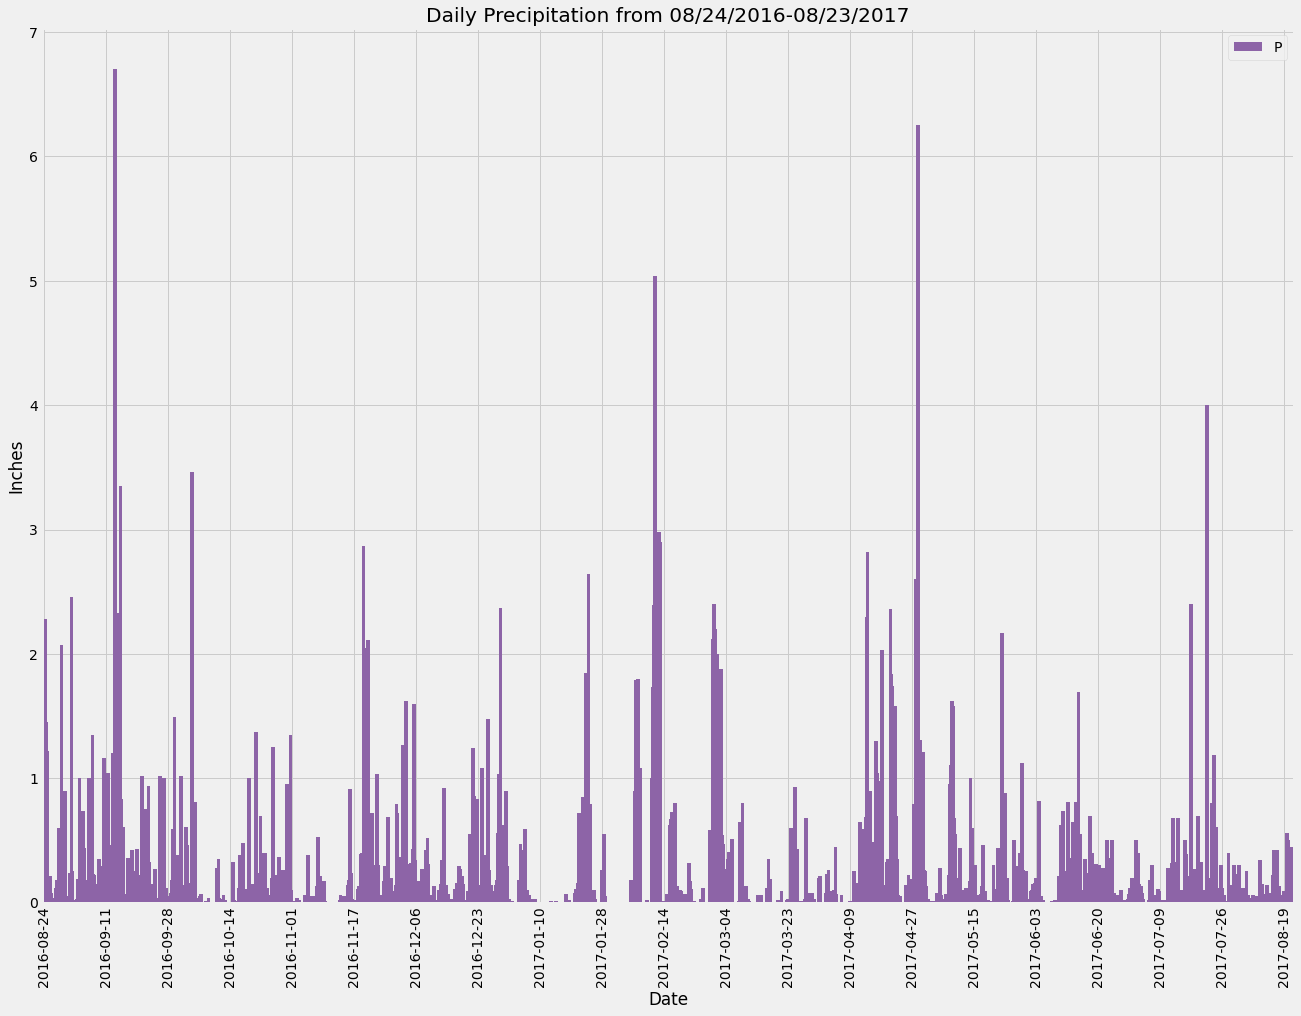

In [101]:
#plotting results with df.plot
last_12_months_df.plot(kind='bar', figsize=(20, 15), width=6, color='#8D64A7')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.legend('Precipitation', loc='best')
plt.title('Daily Precipitation from 08/24/2016-08/23/2017')
plt.xticks(np.arange(0, len(last_12_months_df)+1, 100))
           
plt.show()

In [56]:
#print summary statistics
last_12_months_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
